In [1]:
%load_ext autoreload
%autoreload 2
import os

os.chdir("/home/jorge/thesis")

from text3d2video.artifacts.anim_artifact import AnimationArtifact
import torch
import torchvision.transforms.functional as TF

anim = AnimationArtifact.from_wandb_artifact_tag("backflip:latest")

## Empty Tensor should not change output

In [2]:
from text3d2video.util import blend_features

original_features = torch.randn(1, 3, 100, 100)
rendered = torch.zeros_like(original_features)

blended = blend_features(original_features, rendered, alpha=1, channel_dim=1)
assert torch.all(blended == original_features)

In [ ]:
from text3d2video.utilities.testing_utils import test_img


## Example Rendered Features

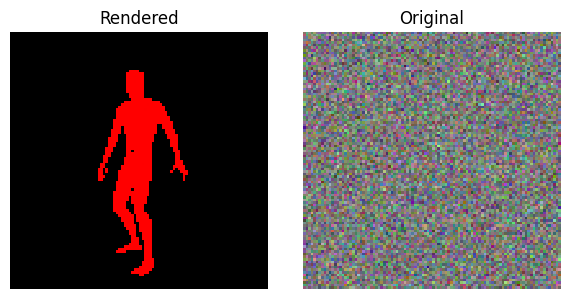

In [22]:
from text3d2video.rendering import render_texture
from text3d2video.util import chw_to_hwc
from text3d2video.utilities.ipython_utils import display_ims

cam, mesh = anim.load_frames(1)
verts_uvs, faces_uvs = anim.uv_data()

# initialize red feature texture
texture = chw_to_hwc(test_img(color="red", return_type="pt")).cuda()
rendered_features = render_texture(
    mesh, cam, texture, verts_uvs, faces_uvs, resolution=100
)[0]

# initialize random original feature
original_features = torch.randn_like(rendered_features)
original_features = (original_features - original_features.min()) / (
    original_features.max() - original_features.min()
)

ims = [TF.to_pil_image(fmap) for fmap in [rendered_features, original_features]]
display_ims(ims, titles=["Rendered", "Original"], scale=3)

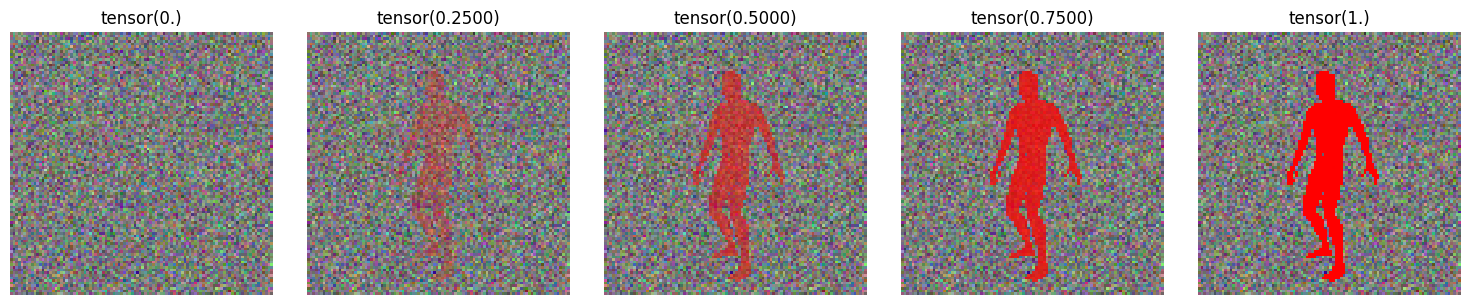

In [23]:
from text3d2video.util import blend_features

n_alphas = 5
alphas = torch.linspace(0, 1, n_alphas)

blended_features = [
    blend_features(original_features, rendered_features, alpha, channel_dim=0)
    for alpha in alphas
]

ims = [TF.to_pil_image(fmap) for fmap in blended_features]
display_ims(ims, titles=alphas)

shape: torch.Size([1, 1, 3, 100, 100]) channel_dim: 2 alpha: 0.5


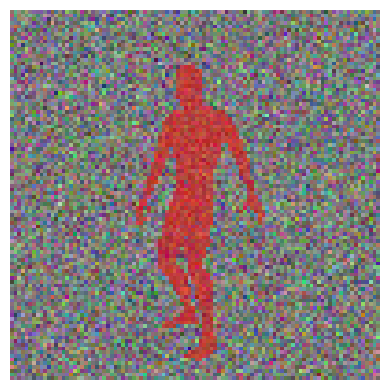

In [24]:
original_batched = original_features.unsqueeze(0).unsqueeze(0)
rendered_batched = rendered_features.unsqueeze(0).unsqueeze(0)

channel_dim = 2
alpha = 0.5

print("shape:", original_batched.shape, "channel_dim:", channel_dim, "alpha:", alpha)

blended_batched = blend_features(
    original_batched, rendered_batched, 0.5, channel_dim=channel_dim
)

blended = blended_batched[0, 0]

display_ims([TF.to_pil_image(blended)], scale=4)